<a href="https://colab.research.google.com/github/sayed6201/nlp_20newsgroups_exercise/blob/main/exercise_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

In [16]:
import sklearn as sklearn
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report


# **Data Importing**

In [17]:
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

In [18]:
pprint(list(newsgroups_train.target_names))
pprint(dir(newsgroups_train))
pprint(newsgroups_train.target)

pprint(len(newsgroups_train.data))
pprint(len(newsgroups_test.data))

x_train, y_train = newsgroups_train.data, newsgroups_train.target
x_test, y_test = newsgroups_test.data, newsgroups_test.target

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
['DESCR', 'data', 'filenames', 'target', 'target_names']
array([7, 4, 4, ..., 3, 1, 8])
11314
7532


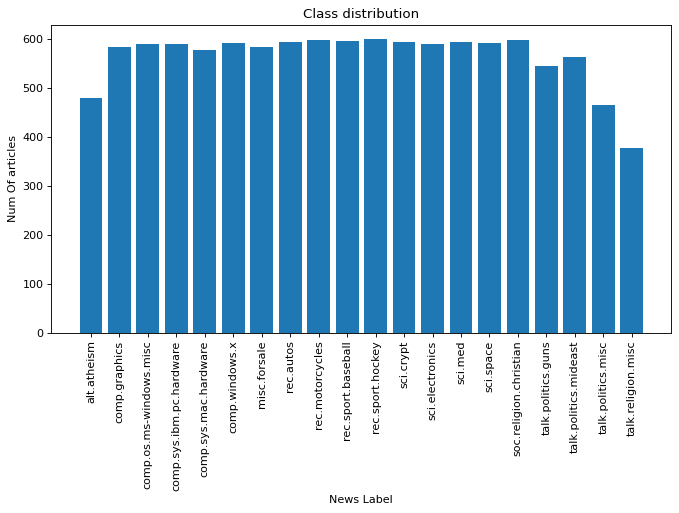

In [ ]:
targets, frequency = np.unique(y_train, return_counts=True)

plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(newsgroups_train.target_names,frequency)
plt.xticks(rotation=90)
plt.title('Class distribution')
plt.xlabel('News Label')
plt.ylabel('Num Of articles')
plt.show()

# **Vectorizing text using CountVectorizer and training some classifiers**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

countVec =  CountVectorizer()
x_train_countV = countVec.fit_transform(x_train)
x_test_countV = countVec.transform(x_test)

**Training ML Models**

                          precision    recall  f1-score   support

             alt.atheism       0.79      0.77      0.78       319
           comp.graphics       0.67      0.74      0.70       389
 comp.os.ms-windows.misc       0.20      0.00      0.01       394
comp.sys.ibm.pc.hardware       0.56      0.77      0.65       392
   comp.sys.mac.hardware       0.84      0.75      0.79       385
          comp.windows.x       0.65      0.84      0.73       395
            misc.forsale       0.93      0.65      0.77       390
               rec.autos       0.87      0.91      0.89       396
         rec.motorcycles       0.96      0.92      0.94       398
      rec.sport.baseball       0.96      0.87      0.91       397
        rec.sport.hockey       0.93      0.96      0.95       399
               sci.crypt       0.67      0.95      0.78       396
         sci.electronics       0.79      0.66      0.72       393
                 sci.med       0.87      0.82      0.85       396
         

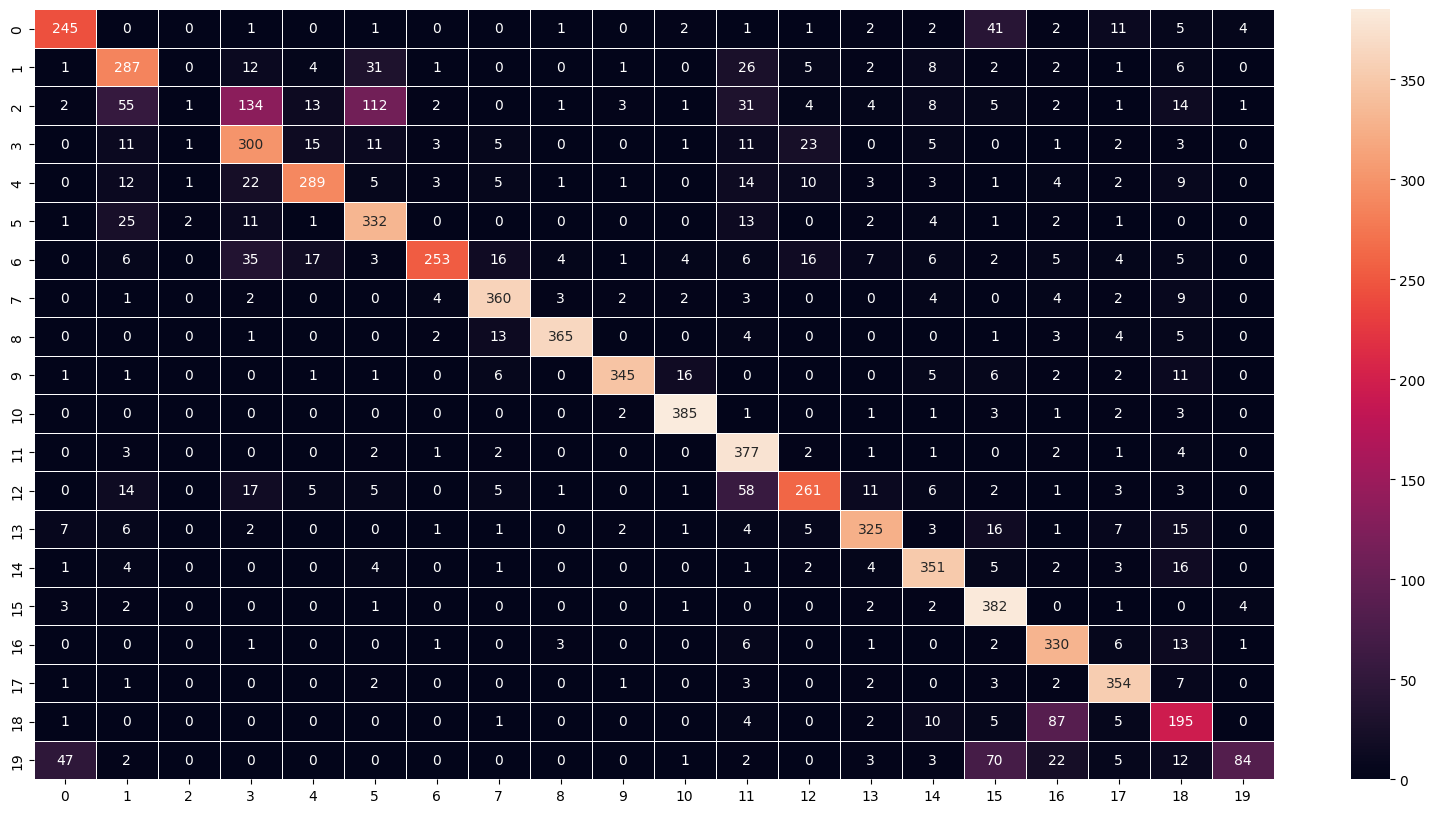

In [ ]:

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
import json

ml_MNB_model =  MultinomialNB()
ml_MNB_model.fit(x_train_countV, y_train)
predicted_y_mnb = ml_MNB_model.predict(x_test_countV)


plt.figure(figsize=(20, 10))
sns.heatmap(confusion_matrix(y_test, predicted_y_mnb), annot=True, fmt="d",  linewidths=0.6)

print(classification_report(y_test,predicted_y_mnb, target_names=newsgroups_train.target_names))



                          precision    recall  f1-score   support

             alt.atheism       0.74      0.73      0.73       319
           comp.graphics       0.68      0.75      0.71       389
 comp.os.ms-windows.misc       0.71      0.66      0.69       394
comp.sys.ibm.pc.hardware       0.66      0.69      0.68       392
   comp.sys.mac.hardware       0.76      0.81      0.78       385
          comp.windows.x       0.82      0.69      0.75       395
            misc.forsale       0.80      0.88      0.84       390
               rec.autos       0.80      0.84      0.82       396
         rec.motorcycles       0.92      0.92      0.92       398
      rec.sport.baseball       0.83      0.88      0.86       397
        rec.sport.hockey       0.93      0.93      0.93       399
               sci.crypt       0.91      0.86      0.88       396
         sci.electronics       0.69      0.73      0.71       393
                 sci.med       0.82      0.73      0.77       396
         

<Axes: >

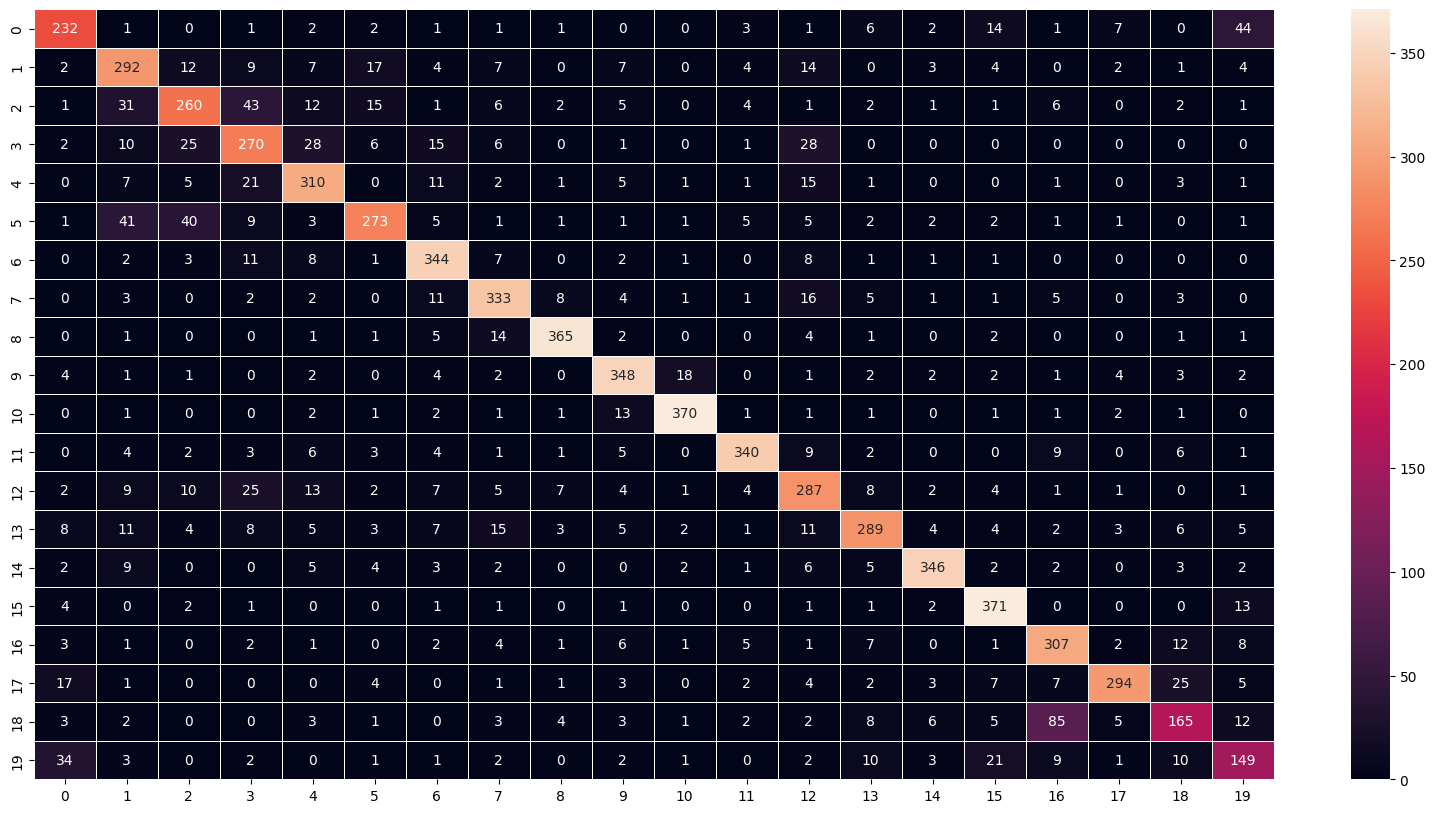

In [ ]:
from sklearn.linear_model import LogisticRegression
ml_model_LR =  LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
ml_model_LR.fit(x_train_countV, y_train)
predicted_y_lr = ml_model_LR.predict(x_test_countV)
print(classification_report(y_test,predicted_y_lr, target_names=newsgroups_train.target_names))

plt.figure(figsize=(20, 10))
sns.heatmap(confusion_matrix(y_test, predicted_y_lr), annot=True, fmt="d", linewidths=0.6)


# **Improvement - Data cleaning, Vectorizing with TFIDF**


In [19]:
import pandas as pd
df_train =  pd.DataFrame({'data': x_train, 'target': y_train})
df_test =  pd.DataFrame({'data': x_test, 'target': y_test})

df_train.head()


,data,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [ ]:
df_test.head()

,data,target
0,From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. ...,7
1,From: Rick Miller <rick@ee.uwm.edu>\nSubject: ...,5
2,From: mathew <mathew@mantis.co.uk>\nSubject: R...,0
3,From: bakken@cs.arizona.edu (Dave Bakken)\nSub...,17
4,From: livesey@solntze.wpd.sgi.com (Jon Livesey...,19


In [ ]:
df_train['data'][0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [20]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
import re
import string

def text_cleaner(text):
  text = re.sub(r"""\w*\d\w*""", ' ', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), ' ',text)
  text = re.sub(r"\r?\n|\r"," ", text)
  text = text.lower()
  text = text.split()
  text = [w for w in text if not w in stop]
  text = " ".join(text)

  return text


df_train['data'] = df_train['data'].apply(text_cleaner)
df_test['data'] = df_test['data'].apply(text_cleaner)


df_train['data'][0]

'lerxst wam umd edu thing subject car nntp posting host wam umd edu organization university maryland college park lines wondering anyone could enlighten car saw day door sports car looked late early called bricklin doors really small addition front bumper separate rest body know anyone tellme model name engine specs years production car made history whatever info funky looking car please e mail thanks il brought neighborhood lerxst'

In [ ]:
df_test['data'][0]

'ubvmsd cc buffalo edu neil b gandler subject need info bonneville organization university buffalo lines news software vax vms vnews nntp posting host ubvmsd cc buffalo edu little confused models bonnevilles heard le se lse sse ssei could someone tell differences far features performance also curious know book value prefereably model much less book value usually get words much demand time year heard mid spring early summer best time buy neil gandler'

In [22]:
nltk.download('punkt')
nltk.download('wordnet')
lemm = nltk.stem.WordNetLemmatizer()

def toknize_my_text(x):
    tokens = ( w for w in nltk.word_tokenize(x) if len(w) >3)
    lemmatized_token = []
    for w in tokens:
      lemmatized_token.append(lemm.lemmatize(w))
    return lemmatized_token

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
dd = toknize_my_text('from  cries cry  ubvmsd cc buffalo edu  neil b  gandler  subject  need info on     bonneville organization  university at buffalo lines    news software  vax vms vnews     nntp posting host  ubvmsd cc buffalo edu    i am a little confused on all of the models of the     bonnevilles  i have heard of the le se lse sse ssei  could someone tell me the differences are far as features or performance  i am also curious to know what the book value is for prefereably the   model  and how much less than book value can you usually get them for  in other words how much are they in demand this time of year  i have heard that the mid spring early summer is the best time to buy   			neil gandler')
print(list(dd))

['from', 'cry', 'ubvmsd', 'buffalo', 'neil', 'gandler', 'subject', 'need', 'info', 'bonneville', 'organization', 'university', 'buffalo', 'line', 'news', 'software', 'vnews', 'nntp', 'posting', 'host', 'ubvmsd', 'buffalo', 'little', 'confused', 'model', 'bonnevilles', 'have', 'heard', 'ssei', 'could', 'someone', 'tell', 'difference', 'feature', 'performance', 'also', 'curious', 'know', 'what', 'book', 'value', 'prefereably', 'model', 'much', 'le', 'than', 'book', 'value', 'usually', 'them', 'other', 'word', 'much', 'they', 'demand', 'this', 'time', 'year', 'have', 'heard', 'that', 'spring', 'early', 'summer', 'best', 'time', 'neil', 'gandler']


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfIdfVec4 =  TfidfVectorizer(
  tokenizer=toknize_my_text
)

x_train_tfids4 = tfIdfVec4.fit_transform(df_train['data'])
x_test_tfids4 = tfIdfVec4.transform(df_test['data'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


# **Training Models**

**LogisticRegression**

                          precision    recall  f1-score   support

             alt.atheism       0.75      0.72      0.74       319
           comp.graphics       0.70      0.76      0.73       389
 comp.os.ms-windows.misc       0.71      0.71      0.71       394
comp.sys.ibm.pc.hardware       0.67      0.69      0.68       392
   comp.sys.mac.hardware       0.80      0.78      0.79       385
          comp.windows.x       0.82      0.75      0.79       395
            misc.forsale       0.80      0.88      0.84       390
               rec.autos       0.87      0.88      0.88       396
         rec.motorcycles       0.96      0.91      0.93       398
      rec.sport.baseball       0.92      0.93      0.93       397
        rec.sport.hockey       0.93      0.94      0.94       399
               sci.crypt       0.93      0.89      0.91       396
         sci.electronics       0.71      0.80      0.75       393
                 sci.med       0.90      0.87      0.89       396
         

<Axes: >

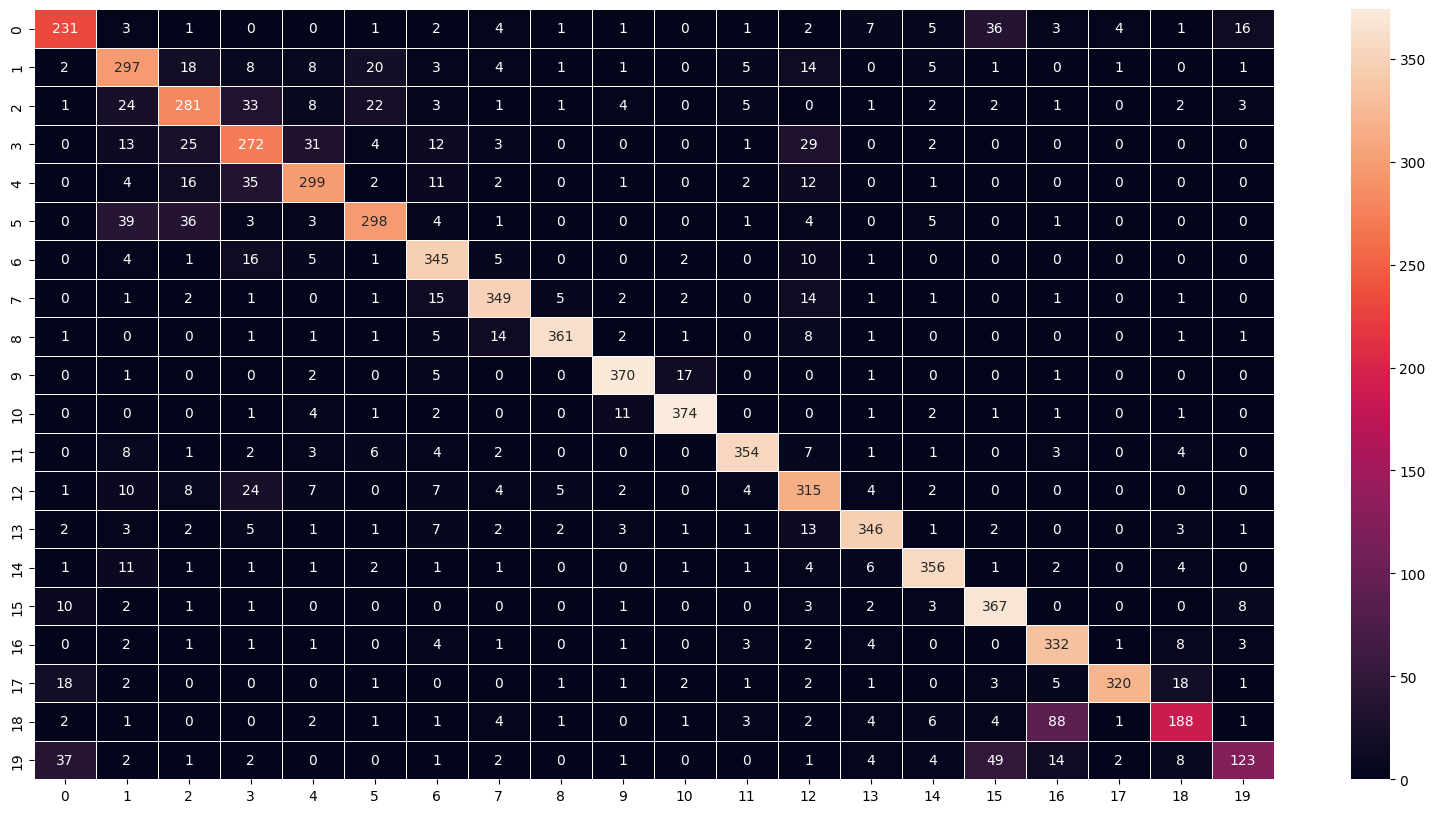

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

ml_model_LR4 =  LogisticRegression(multi_class='multinomial', solver='lbfgs')
ml_model_LR4.fit(x_train_tfids4, y_train)
predicted_y_lr4 = ml_model_LR4.predict(x_test_tfids4)
print(classification_report(y_test,predicted_y_lr4, target_names=newsgroups_train.target_names))

plt.figure(figsize=(20, 10))
sns.heatmap(confusion_matrix(y_test, predicted_y_lr4), annot=True, fmt="d", linewidths=0.6)

**MultinomialNB**

                          precision    recall  f1-score   support

             alt.atheism       0.84      0.66      0.73       319
           comp.graphics       0.79      0.70      0.74       389
 comp.os.ms-windows.misc       0.77      0.66      0.71       394
comp.sys.ibm.pc.hardware       0.62      0.77      0.69       392
   comp.sys.mac.hardware       0.83      0.77      0.80       385
          comp.windows.x       0.86      0.78      0.82       395
            misc.forsale       0.89      0.79      0.83       390
               rec.autos       0.88      0.91      0.90       396
         rec.motorcycles       0.94      0.93      0.94       398
      rec.sport.baseball       0.91      0.92      0.92       397
        rec.sport.hockey       0.89      0.97      0.93       399
               sci.crypt       0.69      0.96      0.81       396
         sci.electronics       0.82      0.67      0.74       393
                 sci.med       0.91      0.81      0.86       396
         

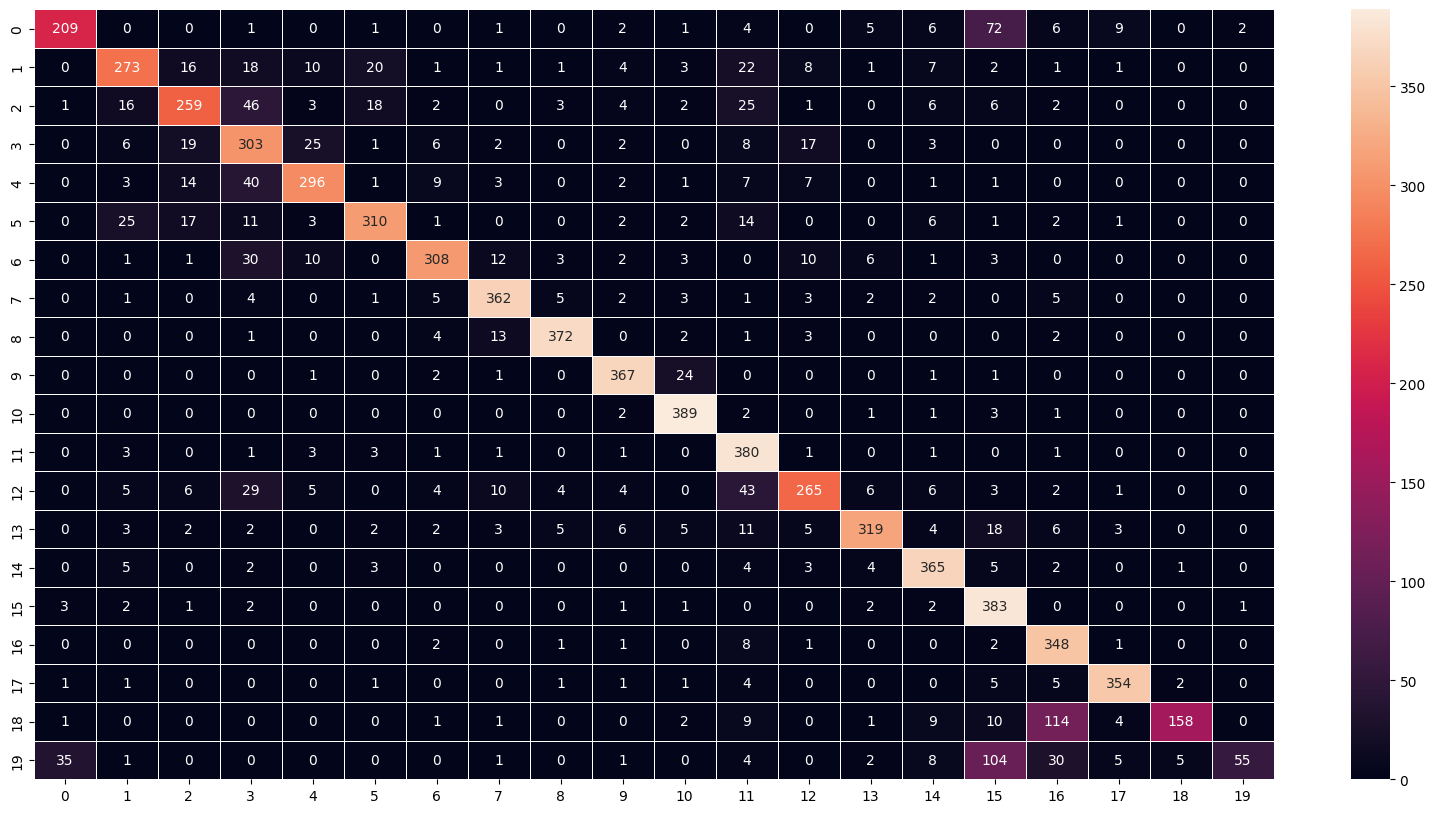

In [ ]:
from sklearn.naive_bayes import MultinomialNB

ml_MNB_model2 =  MultinomialNB()
ml_MNB_model2.fit(x_train_tfids4, y_train)
predicted_y_mnb2 = ml_MNB_model2.predict(x_test_tfids4)


plt.figure(figsize=(20, 10))
sns.heatmap(confusion_matrix(y_test, predicted_y_mnb2), annot=True, fmt="d",  linewidths=0.6)

print(classification_report(y_test,predicted_y_mnb2, target_names=newsgroups_train.target_names))


**RandomForest**

                          precision    recall  f1-score   support

             alt.atheism       0.71      0.63      0.67       319
           comp.graphics       0.57      0.70      0.63       389
 comp.os.ms-windows.misc       0.62      0.72      0.67       394
comp.sys.ibm.pc.hardware       0.58      0.64      0.61       392
   comp.sys.mac.hardware       0.71      0.64      0.68       385
          comp.windows.x       0.78      0.65      0.71       395
            misc.forsale       0.73      0.89      0.80       390
               rec.autos       0.84      0.78      0.81       396
         rec.motorcycles       0.90      0.87      0.88       398
      rec.sport.baseball       0.87      0.91      0.89       397
        rec.sport.hockey       0.88      0.92      0.90       399
               sci.crypt       0.89      0.89      0.89       396
         sci.electronics       0.66      0.58      0.62       393
                 sci.med       0.81      0.78      0.79       396
         

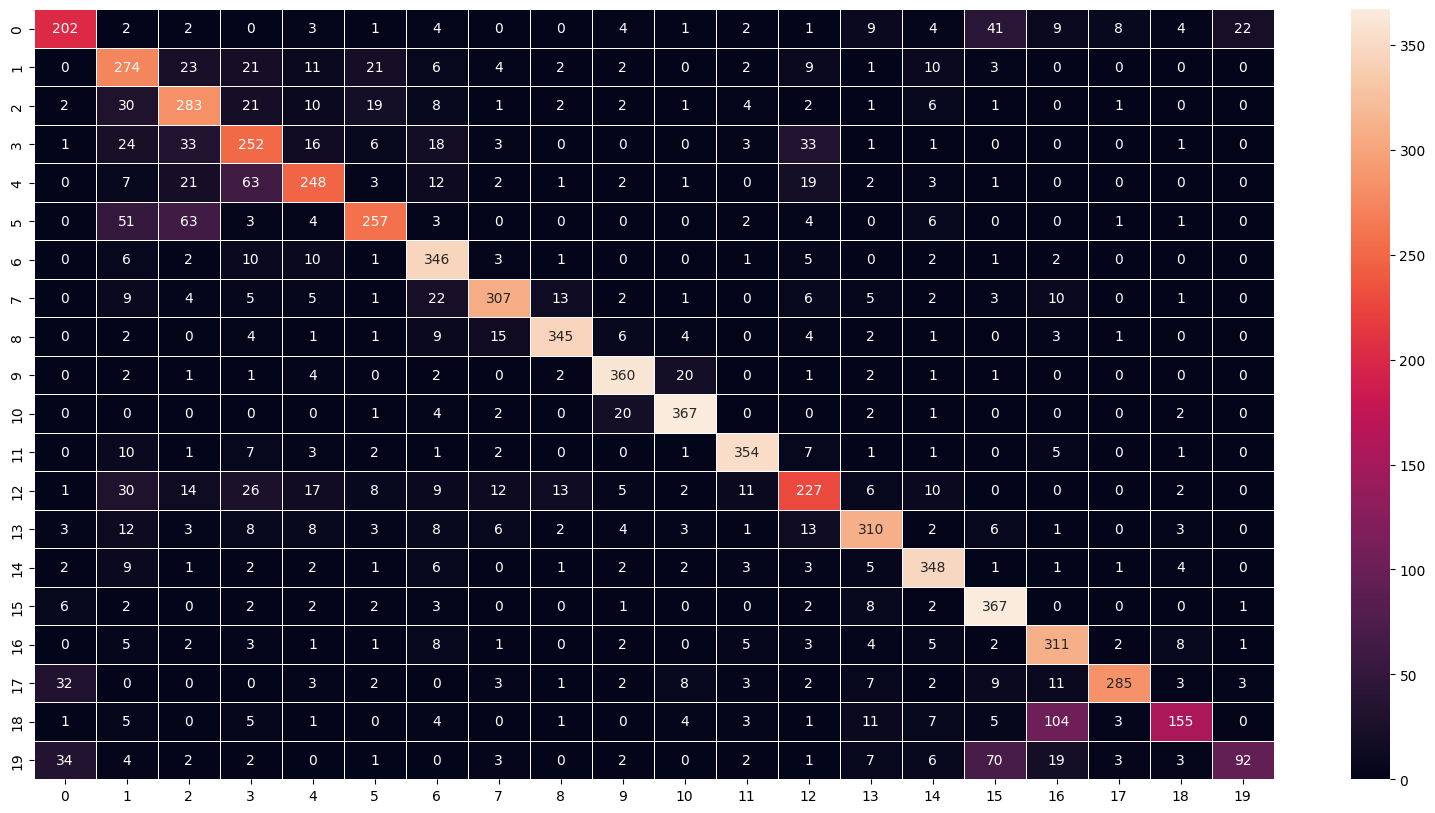

In [ ]:
from sklearn.ensemble import RandomForestClassifier


random_forest = RandomForestClassifier()
random_forest.fit(x_train_tfids4, y_train)

predicted_y_rf = random_forest.predict(x_test_tfids4)


plt.figure(figsize=(20, 10))
sns.heatmap(confusion_matrix(y_test, predicted_y_rf), annot=True, fmt="d",  linewidths=0.6)
print(classification_report(y_test,predicted_y_rf, target_names=newsgroups_train.target_names))

# **Running test on the Example Text data**

Example:
Post: "I think the government should invest more in space exploration. There is so much we
can learn about the universe and our own planet by studying space."

Category: "sci.space"

Post: "What's the best software for creating 3D graphics? I'm interested in designing video
game characters and environments for games set in different spaces."

Category: "comp.graphics"

Post: "Who do you think will win the World Series this year? I'm rooting for my favourites
team."

Category: "rec.sport.baseball"

Post: "The recent conflict in the Middle East has caused a lot of tension and instability. It's
important for world leaders to come together and find a peaceful resolution."

Category: "talk.politics.mideast"

Post: "Who’s the best player ever to place in the NHL? In my mind mind its Gordie Howe."

Category: "rec.sport.hockey"


In [ ]:
pprint(list(newsgroups_train.target_names))


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [ ]:
x_example_test = [
          "I think the government should invest more in space exploration. There is so much we can learn about the universe and our own planet by studying space.",
          "What's the best software for creating 3D graphics? I'm interested in designing video game characters and environments for games set in different spaces.",
          "Who do you think will win the World Series this year? I'm rooting for my favourites team.",
          "The recent conflict in the Middle East has caused a lot of tension and instability. It's important for world leaders to come together and find a peaceful resolution.",
          "Who’s the best player ever to place in the NHL? In my mind mind its Gordie Howe."
]
# ['sci.space', 'comp.graphics','rec.sport.baseball','talk.politics.mideast','rec.sport.hockey']
y_example_test = [
    newsgroups_train.target_names.index('sci.space'), 
    newsgroups_train.target_names.index('comp.graphics'),
    newsgroups_train.target_names.index('rec.sport.baseball'),
    newsgroups_train.target_names.index('talk.politics.mideast'),
    newsgroups_train.target_names.index('rec.sport.hockey'),
  ]

In [ ]:
df_example_test_data = pd.DataFrame({'data': x_example_test, 'target': y_example_test})
df_example_test_data['data'] = df_example_test_data['data'].apply(text_cleaner)
x_example_test_tfidf = tfIdfVec4.transform(df_example_test_data['data'])

**Testing on LR classifier**

In [ ]:
predicted_example_y_lr4 = ml_model_LR4.predict(x_example_test_tfidf)

print(y_example_test) 
print(predicted_example_y_lr4)

[14, 1, 9, 17, 10]
[14  1  9  8  9]


**Testing on MNB classifier**

In [ ]:
predicted_example_y_MNB = ml_MNB_model2.predict(x_example_test_tfidf)

print(y_example_test) 
print(predicted_example_y_MNB)

[14, 1, 9, 17, 10]
[14  1 10 17  9]


**Testing on RF classifier**

In [ ]:
predicted_example_y_RF = random_forest.predict(x_example_test_tfidf)

print(y_example_test) 
print(predicted_example_y_RF)

[14, 1, 9, 17, 10]
[14  1  9  1  9]


# **Explanations**

**How the Models were Evaluated**

I have used Precision, Recall, F1 Score, accuracy to measure the performance of the trained model. A good model would have higher precision and recall value. 

Precision represents the models ability to correctly predict a class(news group). For instance , the trianed LR classifier has a precision of 96% for class "rec.motorcycles" this means that the LR classifer was correct 96 times when it identified an article as rec.motorcycles class out of 100 times and 4 times it was wrong. 

For recall if we take the same example again, the LR classifier has a recall value of 91% which means the model correctly identified 91 clases of the "rec.motorcycles" if it has total 100 data in the entire dataset. and it failed to detect 9 data , if the dataset had 100 instances/rows of that class.

While working on this exercise the, the aim was to increase precision, recall and overall accuracy of the trined model. 

Moreover, depending on the problem type we would try to put more focus on a particular metrices than other.
in this particular exercise if we think of using these trained model to recommend new articles to users based on their choice of subscription higher precision value is desireable than recall. For problems like disease detection we would try to have higher recall value because we want to reduce Flase-Negative values 

**About Trained ML Models**

**Reasons for choosing Logistic regression classfier:**
The reason for choosing logistic regression was
*   It performs better with sparse dataset. After vectorizing the text dataset with TFIDF algorithm most of the values in the vectors will be zero resulting in making the dataset sparse. Logistic regression can perform better with sparse dataset
*   Logistic regression can be regularized to overcome overfitting

*Some Important Hyper-params of LR classfier:*
*   penalty: The above models were trained with l2. the purpose of this parameter is to prevent overfitting by applying specified regularization methods
*   C or Inverse of regularization strength: by default SKLearn library sets this value to 1, the lower value indcates stronger regurazitaion. 






**Reasons for choosing Naive bayas Classifier**: 
 * Naive bayas classifier is widely use for text classification and can perform better with less data
 * The training of MNB model is computationally less expensive. 
 * The model doesn't require hyper-Parameter tuning

**Reasons for choosing Random Forest Classifier:**
*   It is an ensamble algorithm based on a group of decision tree
*   RF is likley to have low bias due to bagging/boostrap approach
* The decision trees work in parallel to compute the prediction, which makes decision tree faster
* The TFIDF vector generated in text preporcessing are higly dimensional and Rnadom forest works good with high dimensional data


*Some important hyper-params of Random forest algorithm:*
* N_estimators:  N_estimators indicates the number of decision trees we want to have in our random forest model. Higher number of estimators might improve the performance of the model but it will also increase the time complexity.
* Min_samples_leaf: 'Min_samples_leaf' indicates the minimum number of samples needed at a leaf node a decision tree can have. Smaller number of Min_Samples_leaf can cause the model to overfit by capturing noises of the training data. Higher numbers generally improve the performance till a certain limit.
* Max_depth: Max_depth indicates the maximum depth a tree in a random forest can have. Generally the deeper the tree the more splits it will have and more information it can learn from the data. However, having trees with higher depth will increase the complexity and may overfit the dataset.
* Bootstrap: Bootstrap can be set to true or false. If we set Bootstrap to false the whole dataset is used to train the model. Bootstrap allows training trees with random by selecting rows randomly from the dataset.



**About Data Preprocessing methods:**

I initially used CountVectorizer() which actually calculates the frequencey of a word in sentence. The limitation with this approach is that it doesn't consider the present of the words in other articles of the dataset. Thus this approach doesn't capture the importance of a word properly.

To improve the performance of the model i later used TFIDF approach which adds basically includes IDF (inverse document frequency) with the frequency in the vectorization process, thus the importance of words are captured properly. If a word is present in multiple articels the TFIDF value will be low, the unique words will have higher values. Using TFIDF approach has improved the performance of the models. 

I also added text cleaning logics to clean unnecessary caharcters, words, stop words, also tokenized and lemmetized the words using nltk library. 

The overall performance of the models have increased after data preprocessing

# **Hyper-parameter Tuning with GridSearch**

**The reason for Hyper-parameter tuning:**
Most of the ML algorthms can accept multiple number of hyper-parameters with multiple values. To find the optimal values of the hyper-parameters for a problem, we require to test the models with different values. There are a number of approach through which these values can be discovered, i am using grid search to find the optimal hyper-parameter values for Random forest algorithm. Gridsearch uses the specified hyper-parameter values to train the models and uses cross-validation approach to measure the performance.

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [250,500],
    'max_depth': [50, 100],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_estimator  = RandomForestClassifier()
rf_Grid = GridSearchCV( estimator = rf_estimator, param_grid = param_grid )

In [25]:
rf_Grid.fit(x_train_tfids4, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [50, 100], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [250, 500]})

In [26]:
rf_Grid.best_params_

{'max_depth': 100,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

                          precision    recall  f1-score   support

             alt.atheism       0.72      0.64      0.68       319
           comp.graphics       0.60      0.72      0.66       389
 comp.os.ms-windows.misc       0.64      0.74      0.69       394
comp.sys.ibm.pc.hardware       0.61      0.61      0.61       392
   comp.sys.mac.hardware       0.77      0.67      0.72       385
          comp.windows.x       0.81      0.69      0.74       395
            misc.forsale       0.74      0.90      0.81       390
               rec.autos       0.86      0.77      0.81       396
         rec.motorcycles       0.90      0.87      0.88       398
      rec.sport.baseball       0.92      0.89      0.91       397
        rec.sport.hockey       0.87      0.95      0.91       399
               sci.crypt       0.90      0.90      0.90       396
         sci.electronics       0.60      0.61      0.60       393
                 sci.med       0.84      0.77      0.80       396
         

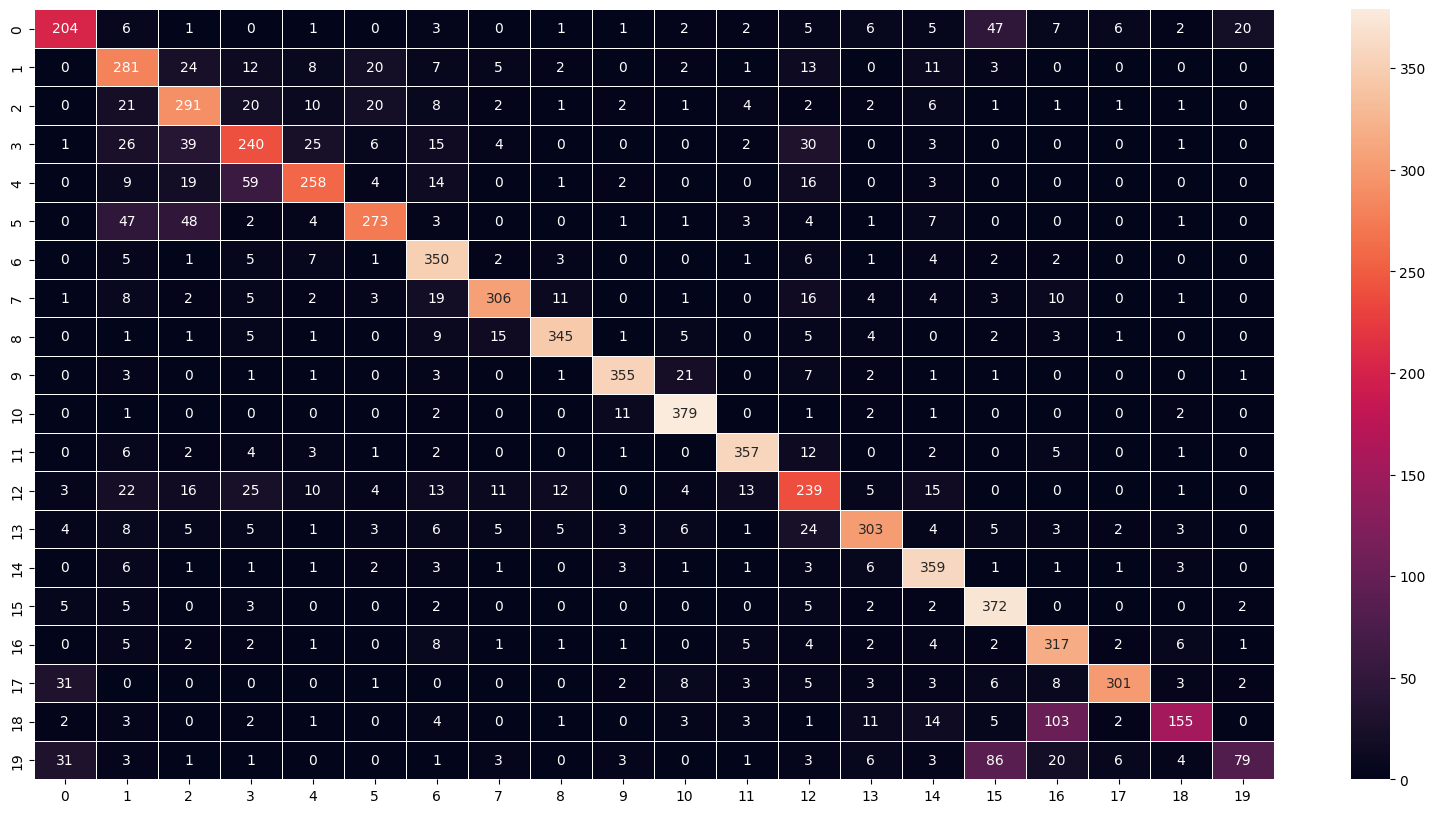

In [27]:
random_forest_tuned = RandomForestClassifier(
 max_depth= 100,
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 500
)
random_forest_tuned.fit(x_train_tfids4, y_train)


random_forest_tuned_pred = random_forest_tuned.predict(x_test_tfids4)


plt.figure(figsize=(20, 10))
sns.heatmap(confusion_matrix(y_test, random_forest_tuned_pred), annot=True, fmt="d",  linewidths=0.6)
print(classification_report(y_test,random_forest_tuned_pred, target_names=newsgroups_train.target_names))